## About Data

## Code

### Import libraries

In [1]:
import os
import random
import librosa
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

In [2]:
#@title Assign Numbers to Classes
classes = {
    'normal': 0, # Normal Heartbeat Sound
    'murmur': 1, # Murmur Heartbeat Sound
    'extrahs': 2, # Extra Heart Sound
    'extrastole': 3, # Extrasystole Heartbeat Sound
    'artifact': 4 # Artifact sound
}

In [3]:
#@title Folder Paths Dataset A
folder_paths_a = {
    'normal': './data/train/dataset_a/Atraining_normal',
    'murmur': './data/train/dataset_a/Atraining_murmur',
    'extrahs': './data/train/dataset_a/Atraining_extrahs',
    'artifact': './data/train/dataset_a/Atraining_artifact'
}

In [4]:
#@title Folder Paths Dataset B
folder_paths_b = {
    'normal': './data/train/dataset_b/Btraining_normal',
    'murmur': './data/train/dataset_b/Btraining_murmur',
    'extrastole': './data/train/dataset_b/Btraining_extrastole'
}

### Load Data

In [5]:
def load_data(folder_path, cl):
    x = []
    y = []
    samples_rate = []

    file_names = os.listdir(folder_path)
    
    for file_name in file_names:
        try:
            file_path = os.path.join(folder_path, file_name)
        except:
            print(f"Error loading data of '{folder_path}'")
        else:
            audio, sr = librosa.load(file_path, sr=None)
            x.append(audio)
            label = classes.get(cl)
            y.append(label)
            samples_rate.append(sr)
            
    return x, y, samples_rate

In [6]:
#@title Load set A and set B
# Dataset A
normal_a_data, normal_a_labels, normal_a_sr = load_data(folder_paths_a.get('normal'), classes.get('normal'))
murmur_a_data, murmur_a_labels, murmur_a_sr = load_data(folder_paths_a.get('murmur'), classes.get('murmur'))
extrahs_data, extrahs_labels, extrahs_sr = load_data(folder_paths_a.get('extrahs'), classes.get('extrahs'))
artifact_data, artifact_labels, artifact_sr = load_data(folder_paths_a.get('artifact'), classes.get('artifact'))
# Dataset B
normal_b_data, normal_b_labels, normal_b_sr = load_data(folder_paths_b.get('normal'), classes.get('normal'))
murmur_b_data, murmur_b_murmur, murmur_b_sr = load_data(folder_paths_b.get('murmur'), classes.get('murmur'))
extrastole_data, extrastole_labels, extrastole_sr = load_data(folder_paths_b.get('extrastole'), classes.get('extrastole'))

# Num data per class set A
num_normal_a = len(normal_a_data)
num_murmur_a = len(murmur_a_data)
num_extrahs = len(extrahs_data)
num_artifact = len(artifact_data)
# Num data per class set B
num_normal_b = len(normal_b_data)
num_murmur_b = len(murmur_b_data)
num_extrastole = len(extrastole_data)

print('DATASET A')
print(f'Normal class: {num_normal_a} - Average sample rates: {np.mean(normal_a_sr)}')
print(f'Murmur class: {num_murmur_a} - Average sample rates: {np.mean(murmur_a_sr)}')
print(f'Extrahs class: {num_extrahs} - Average sample rates: {np.mean(extrahs_sr)}')
print(f'Artifact class: {num_artifact} - Average sample rates: {np.mean(artifact_sr)}')
print('\n')
print('DATASET B')
print(f'Normal class: {num_normal_b} - Average sample rates: {np.mean(normal_b_sr)}')
print(f'Murmur class: {num_murmur_b} - Average sample rates: {np.mean(murmur_b_sr)}')
print(f'Extrastole class: {num_extrastole} - Average sample rates: {np.mean(extrastole_sr)}')

DATASET A
Normal class: 31 - Average sample rates: 44100.0
Murmur class: 34 - Average sample rates: 44100.0
Extrahs class: 19 - Average sample rates: 44100.0
Artifact class: 40 - Average sample rates: 44100.0


DATASET B
Normal class: 200 - Average sample rates: 4000.0
Murmur class: 66 - Average sample rates: 4000.0
Extrastole class: 46 - Average sample rates: 4000.0


### Data Visualization

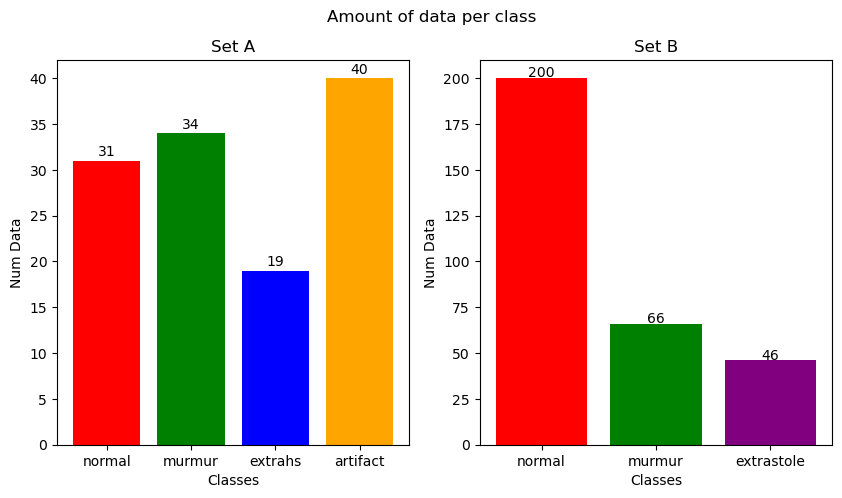

In [7]:
#@title Data distribution of each dataset
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Amount of data per class')
# Bar Graph Dataset A
axs[0].bar(['normal', 'murmur', 'extrahs', 'artifact'], [num_normal_a, num_murmur_a, num_extrahs, num_artifact], color=['red', 'green', 'blue', 'orange']
)
for i, v in enumerate([num_normal_a, num_murmur_a, num_extrahs, num_artifact]):
    axs[0].text(i, v + 0.5, str(v), color='black', ha='center')
# Set title subplot A
axs[0].set_title('Set A')
# Set labels subplot A
axs[0].set(xlabel='Classes', ylabel='Num Data')
# Bar Graph Dataset B
axs[1].bar(['normal', 'murmur', 'extrastole'], [num_normal_b, num_murmur_b, num_extrastole], color=['red', 'green', 'purple']
)
for i, v in enumerate([num_normal_b, num_murmur_b, num_extrastole]):
    axs[1].text(i, v + 0.5, str(v), color='black', ha='center')

axs[1].set_title('Set B')
axs[1].set(xlabel='Classes', ylabel='Num Data')
plt.show()

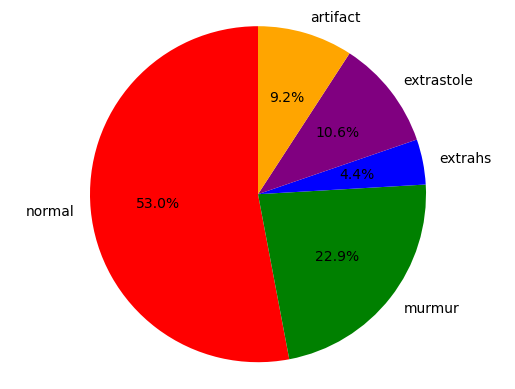

In [8]:
#@title Total Data
num_normal = num_normal_a + num_normal_b
num_murmur = num_murmur_a + num_murmur_b

num_classes = [num_normal, num_murmur, num_extrahs, num_extrastole, num_artifact]
tags = ['normal', 'murmur', 'extrahs', 'extrastole', 'artifact']

# Pie diagram
plt.pie(num_classes, labels=tags, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'purple', 'orange'])
plt.axis('equal')

plt.show()

#### Dataset A

##### Normal Sound (normal)

In [9]:
#@title Normal Heartbeat Sound
idx = random.randint(0, len(normal_a_data)-1)
rnd_normal_a = normal_a_data[idx]
rnd_normal_a_sr = normal_a_sr[idx]
# play audio
Audio(rnd_normal_a, rate=rnd_normal_a_sr)

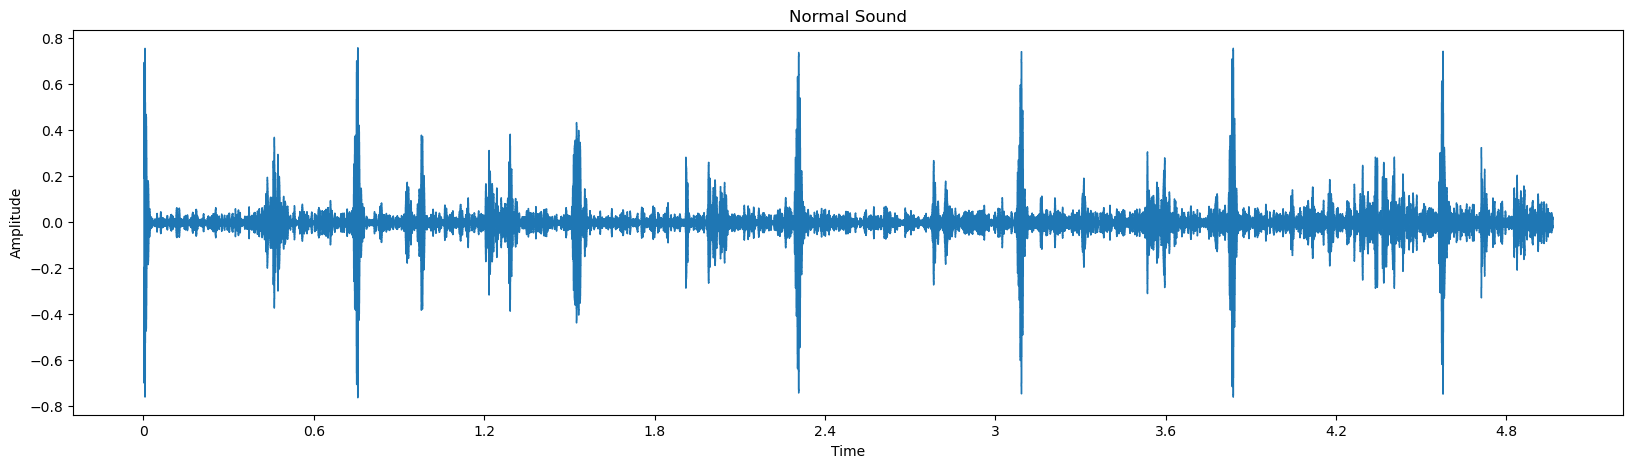

In [10]:
#@title Normal Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_normal_a, sr=rnd_normal_a_sr)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

##### Murmur Sound (murmur)

In [11]:
#@title Murmur Heartbeat Sound
idx = random.randint(0, len(murmur_a_data)-1)
rnd_murmur_a = murmur_a_data[idx]
rnd_murmur_a_sr = murmur_a_sr[idx]
# play audio
Audio(rnd_murmur_a, rate=rnd_murmur_a_sr)

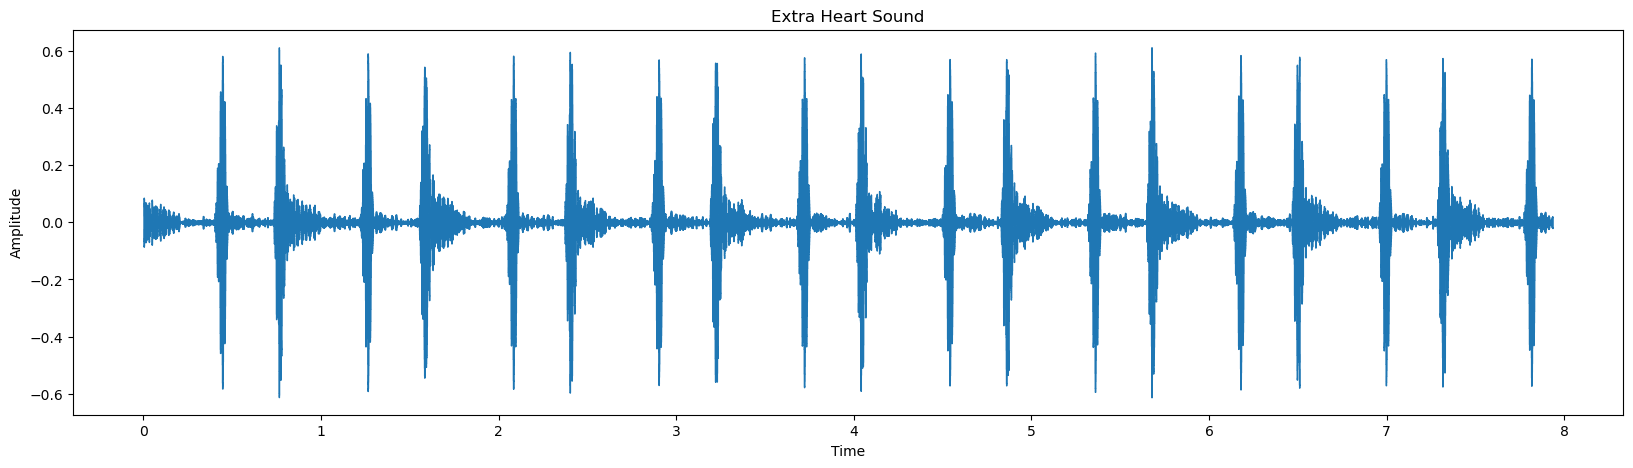

In [12]:
#@title Murmur Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_murmur_a, sr=rnd_murmur_a_sr)
plt.title("Extra Heart Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

##### Extra Heart Sound (extrahs)

In [13]:
#@title Extra Heart Sound
idx = random.randint(0, len(extrahs_data)-1)
rnd_extrahs = extrahs_data[idx]
rnd_extrahs_sr = extrahs_sr[idx]
# play audio
Audio(rnd_extrahs, rate=rnd_extrahs_sr)

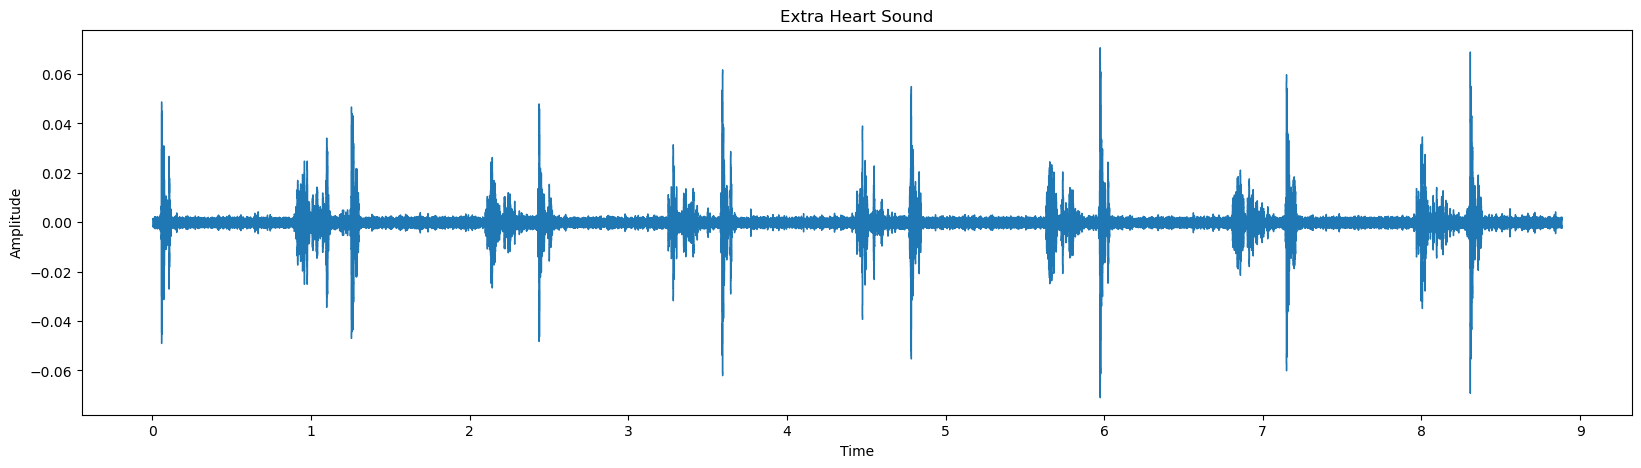

In [14]:
#@title Extra Heart Sound Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_extrahs, sr=rnd_extrahs_sr)
plt.title("Extra Heart Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

##### Artifact Sound (artifact)

In [15]:
#@title Artifact sound
idx = random.randint(0, len(artifact_data)-1)
rnd_artifact = artifact_data[idx]
rnd_artifact_sr = artifact_sr[idx]
# play audio
Audio(rnd_artifact, rate=rnd_artifact_sr)

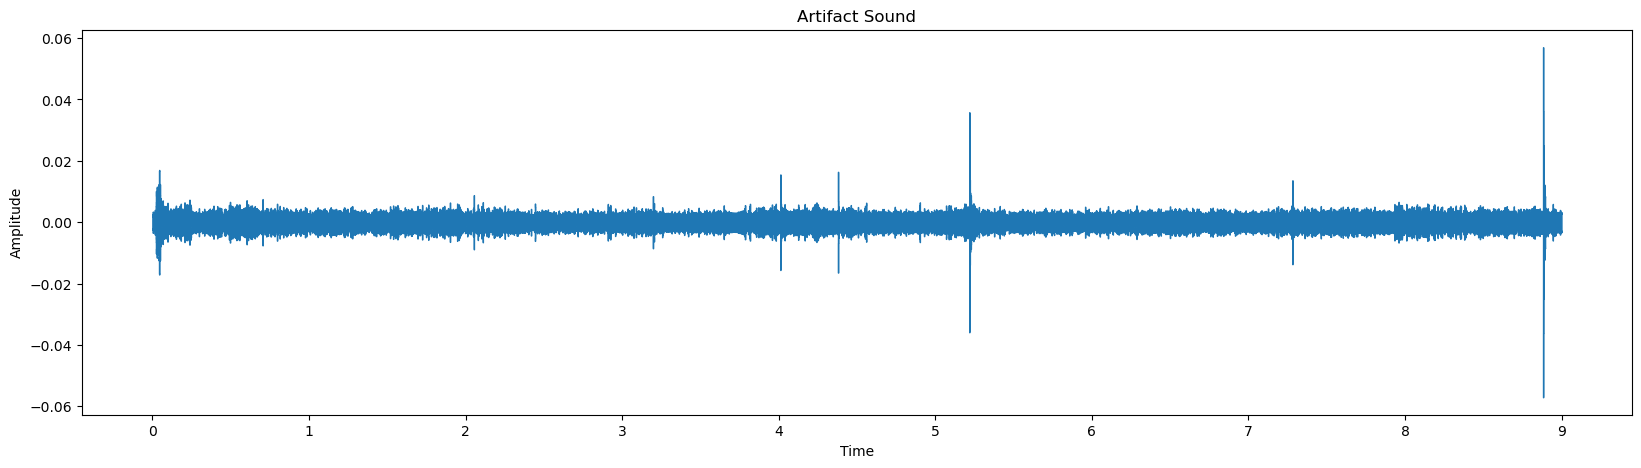

In [16]:
#@title Artifact Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_artifact, sr=rnd_artifact_sr)
plt.title("Artifact Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

#### Dataset B

##### Normal Sound (normal)

In [17]:
#@title Normal Heartbeat
idx = random.randint(0, len(normal_b_data)-1)
rnd_normal_b = normal_b_data[idx]
rnd_normal_b_sr = normal_b_sr[idx]
# play audio
Audio(rnd_normal_b, rate=rnd_normal_b_sr)

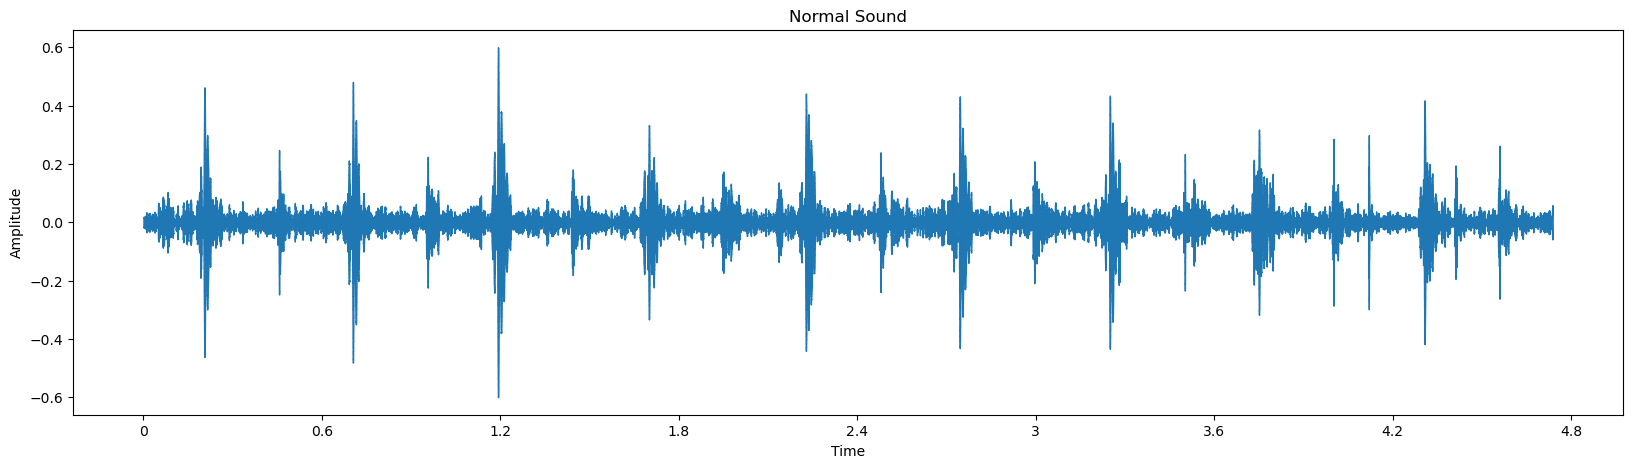

In [18]:
#@title Normal Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_normal_b, sr=rnd_normal_b_sr)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

##### Murmur Sound (murmur)

In [19]:
#@title Murmur Heartbeat Sound
idx = random.randint(0, len(murmur_b_data)-1)
rnd_murmur_b = murmur_b_data[idx]
rnd_murmur_b_sr = murmur_b_sr[idx]
# play audio
Audio(rnd_murmur_b, rate=rnd_murmur_b_sr)

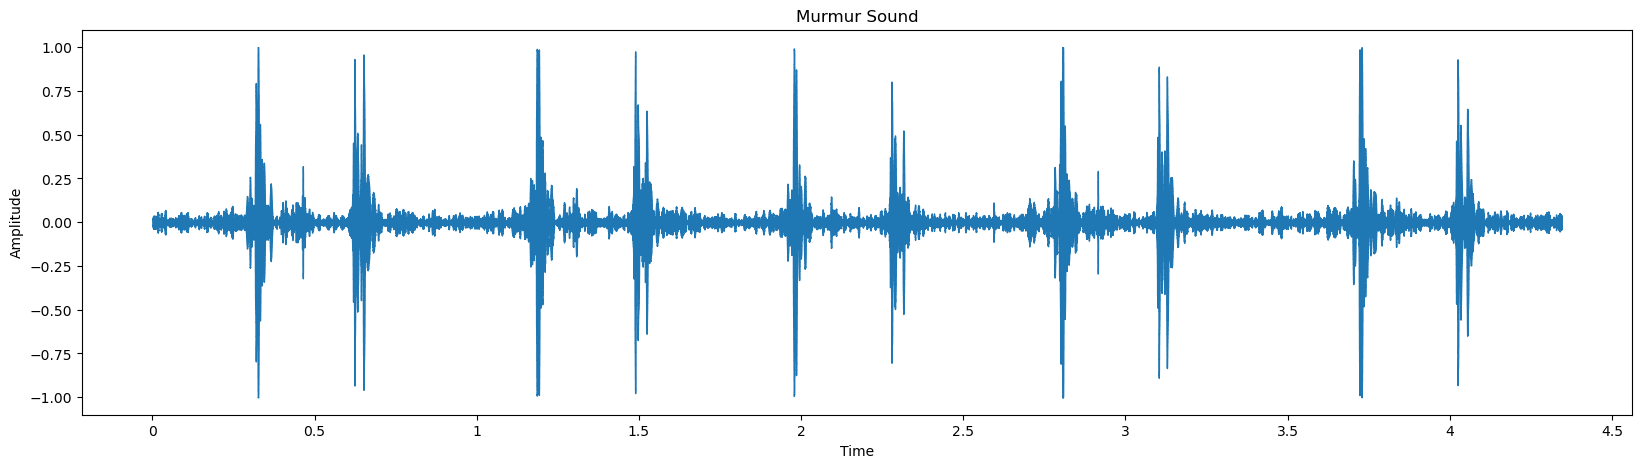

In [20]:
#@title Murmur Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_murmur_b, sr=rnd_murmur_b_sr)
plt.title("Murmur Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

##### Extrasystole Sound (extrastole)

In [21]:
#@title Extrasistole Heartbeat Sound
idx = random.randint(0, len(extrastole_data)-1)
rnd_extrastole = extrastole_data[idx]
rnd_extrastole_sr = extrastole_sr[idx]
# play audio
Audio(rnd_extrastole, rate=rnd_extrastole_sr)

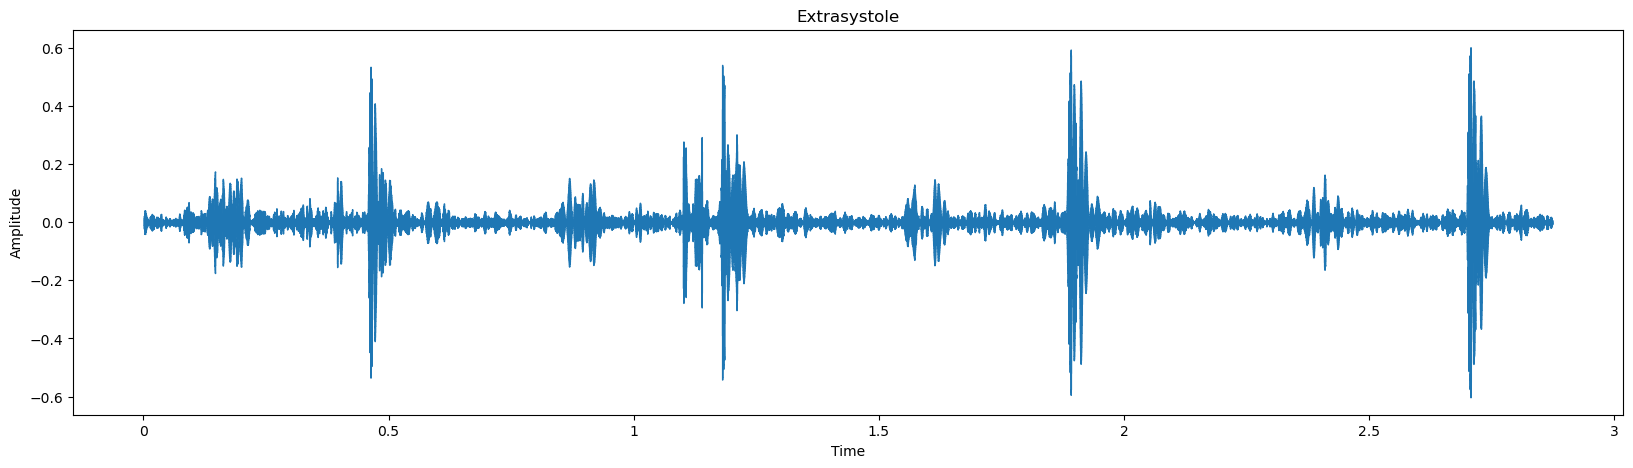

In [22]:
#@title Extrasystole Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_extrastole, sr=rnd_extrastole_sr)
plt.title("Extrasystole")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Data Preprossecing

Como es evidente, los audios no poseen todos la misma duración, por lo que ésto supondría el primer problema, además se puede evidenciar también que la tasa de muestreo para los segmentos de audios del dataset A es de 44100 Hz y para el dataset B es de 4000 Hz. Otro punto importate a destacar es el desbalance de clases, donde se puede notar un mayor número de datos para la clase murmur y normal tomando todos los datos en conjunto.

#### Time Duration

Para solucionar el primer problema entonces, es necesario establecer una magnitud de tiempo igual para todos os segmentos de audio, en lo que se presentan tres casos:

- La duración es igual. No se haría nada con el segmento de audio.
- La duración es mayor. Habría que recortar el segmento de audio.
- La duración es menor. Es necesario rellenar el tiempo faltante.

Esta última es la que supone un riesgo mayor dado a que puede haber una mayor alteración en la naturaleza de los segmentos de audio. Ante esto se consideran dos opciones:

- Rellenar de ceros lo que resta de tiempo.
- Replicar la señal varias veces hasta alcanzar el tiempo límite.

In [23]:
# This function adjusts the duration of the audio segments to the desired time as well as setting a new sample rate for each one so that they all have the same one.
def fix_audio_length(data, time_duration, sr=44100):
    data_fix = []
    new_length = sr*time_duration
    
    for element in data:
        dur = librosa.get_duration(y=element, sr=sr)
        if dur != time_duration:
            fixed_element = librosa.util.fix_length(data=element, size=new_length)
            data_fix.append(fixed_element)
        else:
            data_fix.append(element)
    return data_fix

In [27]:
#@title Fix Data
time_duration = 10 #seconds
sr = 44100
fix_normal_a_data = fix_audio_length(normal_a_data, time_duration, sr)
fix_murmur_a_data = fix_audio_length(murmur_a_data, time_duration, sr)
fix_extrahs_data = fix_audio_length(extrahs_data, time_duration, sr)
fix_artifact_data = fix_audio_length(artifact_data, time_duration, sr)
fix_normal_b_data = fix_audio_length(normal_b_data, time_duration, sr)
fix_murmur_b_data = fix_audio_length(murmur_b_data, time_duration, sr)
fix_extrastole_data = fix_audio_length(extrastole_data, time_duration, sr)